In [1]:
#Getting Packages
try:
  # This command only in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [2]:
# Get project files
!wget https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip

!unzip cats_and_dogs.zip

PATH = 'cats_and_dogs'

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')

# Get number of files in each directory. The train and validation directories
# each have the subdirecories "dogs" and "cats".
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))

# Variables for pre-processing and training.
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

Streaming output truncated to the last 5000 lines.
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.657.jpg  
  inflating: cats_and_dogs/train/dogs/dog.131.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.131.jpg  
  inflating: cats_and_dogs/train/dogs/dog.119.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.119.jpg  
  inflating: cats_and_dogs/train/dogs/dog.74.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.74.jpg  
  inflating: cats_and_dogs/train/dogs/dog.60.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.60.jpg  
  inflating: cats_and_dogs/train/dogs/dog.858.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.858.jpg  
  inflating: cats_and_dogs/train/dogs/dog.680.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.680.jpg  
  inflating: cats_and_dogs/train/dogs/dog.694.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.694.jpg  
  inflating: cats_and_dogs/train/dogs/dog.864.jpg  
  inflating: __MACOSX/cats_and_do

In [3]:
# Now it is your turn! Set each of the variables in this cell correctly. (They should no longer equal None.)

# Create image generators for each of the three image data sets (train, validation, test). Use ImageDataGenerator to read / decode the images and convert them into floating point tensors.
# Use the rescale argument (and no other arguments for now) to rescale the tensors from values between 0 and 255 to values between 0 and 1.

# For the *_data_gen variables, use the flow_from_directory method. Pass in the batch size, directory, target size ((IMG_HEIGHT, IMG_WIDTH)), class mode, and anything else required. test_data_gen will be the trickiest one.
# For test_data_gen, make sure to pass in shuffle=False to the flow_from_directory method. This will make sure the final predictions stay is in the order that our test expects.
# For test_data_gen it will also be helpful to observe the directory structure.

# After you run the code, the output should look like this:
# Found 2000 images belonging to 2 classes.
# Found 1000 images belonging to 2 classes.
# Found 50 images belonging to 1 class.

In [4]:
# 3. The ImageDataGenerator class from TensorFlow's Keras API is a powerful tool for data augmentation and preprocessing when working with image data.
#     It allows you to generate augmented images on-the-fly during the training of deep learning models.

train_image_generator = ImageDataGenerator(
      rescale=1./255,          # Rescale the tensors from values between 0 and 255 to values between 0 and 1
    # rotation_range=20,           # Rotate images by up to 20 degrees
    # width_shift_range=0.2,       # Shift width by up to 20% of the image width
    # height_shift_range=0.2,      # Shift height by up to 20% of the image height
    # shear_range=0.2,             # Apply shear transformations
    # zoom_range=0.2,              # Zoom in by up to 20%
    # horizontal_flip=True,        # Flip horizontally
    # vertical_flip=True,          # Flip vertically
    # fill_mode='nearest'          # Fill in missing pixels using the nearest neighbor
)

validation_image_generator = ImageDataGenerator(
      rescale=1./255,          # Rescale the tensors from values between 0 and 255 to values between 0 and 1
)

test_image_generator = ImageDataGenerator(
      rescale=1./255,          # Rescale the tensors from values between 0 and 255 to values between 0 and 1
)



train_data_gen = train_image_generator.flow_from_directory(
    directory=train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),      # Resizes images to a specific size
    batch_size=batch_size,               # Number of images in each batch
    class_mode='binary'     # Type of labels (e.g., 'binary' or 'categorical')
)

val_data_gen = validation_image_generator.flow_from_directory(
    directory=validation_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),      # Resizes images to a specific size
    batch_size=batch_size,               # Number of images in each batch
    class_mode='binary'     # Type of labels (e.g., 'binary' or 'categorical')
)

test_data_gen = test_image_generator.flow_from_directory(
    directory=test_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),      # Resizes images to a specific size
    batch_size=batch_size,               # Number of images in each batch
    class_mode='binary',classes=['.'],     # Type of labels (e.g., 'binary' or 'categorical')
    shuffle=False           # For test set, Shuflle must be set to False
    )

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 50 images belonging to 1 classes.


In [5]:
# The plotImages function will be used a few times to plot images. It takes an array of images and a probabilities list, although the probabilities list is optional.
# This code is given to you. If you created the train_data_gen variable correctly, then running this cell will plot n random training images.

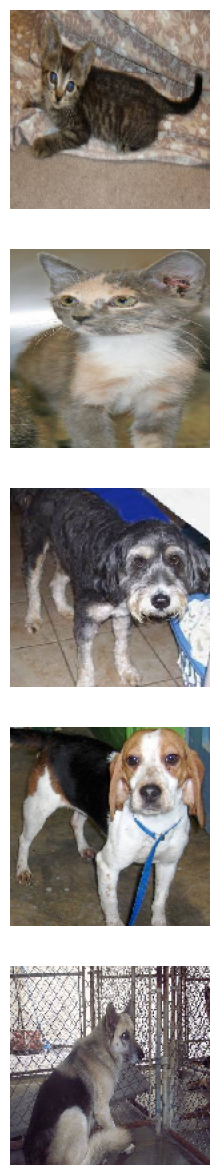

In [6]:
# 4
n = 5
def plotImages(images_arr, probabilities = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax in zip( images_arr, probabilities, axes):
          ax.imshow(img)
          ax.axis('off')
          if probability > 0.5:
              ax.set_title("%.2f" % (probability*100) + "% dog")
          else:
              ax.set_title("%.2f" % ((1-probability)*100) + "% cat")
    plt.show()

sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:n])


In [7]:
# Recreate the train_image_generator using ImageDataGenerator.

# Since there are a small number of training examples, there is a risk of overfitting. One way to fix this problem is by creating more training data from existing training examples by using random transformations.

# Add 4-6 random transformations as arguments to ImageDataGenerator. Make sure to rescale the same as before.

In [8]:
# 5 Each new line is a random transformation
train_image_generator = ImageDataGenerator(
      rescale=1./255,          # Rescale the tensors from values between 0 and 255 to values between 0 and 1
      rotation_range=20,           # Rotate images by up to 20 degrees
      width_shift_range=0.2,       # Shift width by up to 20% of the image width
      height_shift_range=0.2,      # Shift height by up to 20% of the image height
      shear_range=0.2,             # Apply shear transformations
      zoom_range=0.2,              # Zoom in by up to 20%
      horizontal_flip=True,        # Flip horizontally
      vertical_flip=True,          # Flip vertically
      #fill_mode='nearest'          # Fill in missing pixels using the nearest neighbor
)

In [9]:
# You don't have to do anything for this cell. train_data_gen is created just like before but with the new train_image_generator.
#  Then, a single image is plotted n different times using different variations.

Found 2000 images belonging to 2 classes.


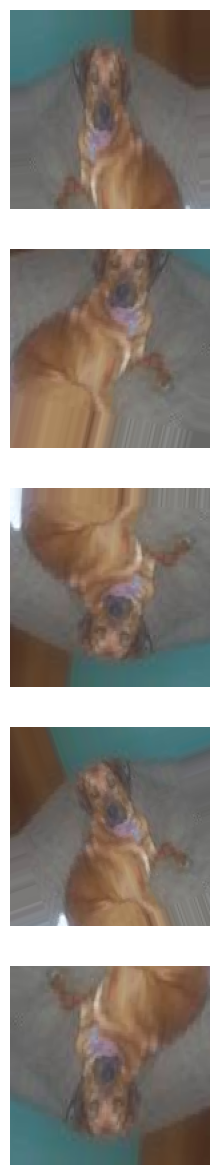

In [10]:
# 6
n = 5
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

augmented_images = [train_data_gen[0][0][0] for i in range(n)]

plotImages(augmented_images)

In [11]:
# In this cell, create a model for the neural network that outputs class probabilities.
# It should use the Keras Sequential model. It will probably involve a stack of Conv2D and MaxPooling2D layers and then a fully connected layer on top that is activated by a ReLU activation function.
#Fully Connected Layer is a Dense Layer
# Compile the model passing the arguments to set the optimizer and loss. Also pass in metrics=['accuracy'] to view training and validation accuracy for each training epoch.

# Layer 1 - The input shape of our data will be 150, 150, 3 and will process 32 filters of size 3x3 over our input data. We will also apply the activation function relu to the output of each convolution operation.
# Layer 2 - This layer will perform the max pooling operation using 2x2 samples and a stride of 2.
#Final layer is Dense Layer - So far we have just completed the convolution base. Now we need to take athese extracted features and add a way to classify them.
# This is why we add Dense layers to our model

In [12]:
# 7
model = Sequential()
#Add layer. Check the input shape info and process info
model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (IMG_HEIGHT, IMG_WIDTH, 3)))
#Add another layer
model.add(MaxPooling2D((2,2)))
#For now add just another Conv2d
model.add(Conv2D(64, (3,3), activation = 'relu'))
#Add another layer
model.add(MaxPooling2D((2,2)))
#For now add just another Conv2d
# model.add(Conv2D(64, (3,3), activation = 'relu'))
#Add a flatten layer
model.add(Flatten())
#add a dense layer
model.add(Dense(64,activation = 'relu')) #this filter should match the upper filter
#Add final dense layer to predict the number of classes (2 in this case)
# model.add(Dense(2,activation = 'relu')) #final output is 2

model.summary()

model.compile(optimizer = 'adam', #tf.keras.optimizers.Adam(learning_rate=0.001)
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 82944)             0         
                                                                 
 dense (Dense)               (None, 64)                5

In [13]:
# Use the fit method on your model to train the network. Make sure to pass in arguments for x, steps_per_epoch, epochs, validation_data, and validation_steps.
#Change runtime to a GPU option.

In [14]:
# 8
history = model.fit(
                    x=train_data_gen,
                    steps_per_epoch=total_train // batch_size,
                    epochs=epochs,
                    validation_data=val_data_gen,
                    validation_steps=total_val // batch_size)

Epoch 1/15
15/15 [==============================] - 22s 1s/step - loss: 1.0387 - accuracy: 0.4754 - val_loss: 0.7497 - val_accuracy: 0.4967
Epoch 2/15
15/15 [==============================] - 18s 1s/step - loss: 0.7161 - accuracy: 0.5091 - val_loss: 0.6610 - val_accuracy: 0.5569
Epoch 3/15
15/15 [==============================] - 18s 1s/step - loss: 0.6770 - accuracy: 0.5662 - val_loss: 0.6313 - val_accuracy: 0.6071
Epoch 4/15
15/15 [==============================] - 16s 1s/step - loss: 0.6527 - accuracy: 0.5962 - val_loss: 0.6148 - val_accuracy: 0.6596
Epoch 5/15
15/15 [==============================] - 16s 1s/step - loss: 0.6333 - accuracy: 0.6266 - val_loss: 0.5980 - val_accuracy: 0.6752
Epoch 6/15
15/15 [==============================] - 16s 1s/step - loss: 0.6268 - accuracy: 0.6400 - val_loss: 0.6124 - val_accuracy: 0.6362
Epoch 7/15
15/15 [==============================] - 19s 1s/step - loss: 0.6412 - accuracy: 0.6149 - val_loss: 0.6186 - val_accuracy: 0.6674
Epoch 8/15
15/15 [==

In [15]:
# Run this cell to visualize the accuracy and loss of the model.

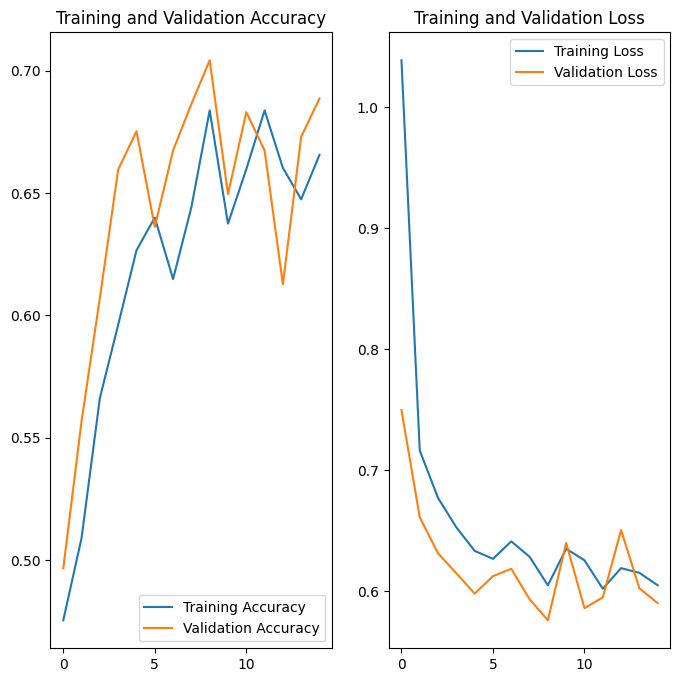

In [16]:
# 9
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [17]:
# Now it is time to use your model to predict whether a brand new image is a cat or a dog.

# In this cell, get the probability that each test image (from test_data_gen) is a dog or a cat. probabilities should be a list of integers.

# Call the plotImages function and pass in the test images and the probabilities corresponding to each test image.

# After you run the cell, you should see all 50 test images with a label showing the percentage of "sure" that the image is a cat or a dog.
# The accuracy will correspond to the accuracy shown in the graph above (after running the previous cell). More training images could lead to a higher accuracy.

In [18]:
# 10
test_loss, test_acc = model.evaluate(test_data_gen)
print("Test acc:", test_acc)

test_images, _ = next(test_data_gen)
predictions = model.predict(test_data_gen)
probabilities = np.argmax(predictions, axis=-1)


plotImages(test_images, probabilities=probabilities)

Output hidden; open in https://colab.research.google.com to view.

In [19]:
# Run this final cell to see if you passed the challenge or if you need to keep trying.



In [20]:
# 11
answers =  [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
            1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
            1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
            1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
            0, 0, 0, 0, 0, 0]

correct = 0

for probability, answer in zip(probabilities, answers):
  if round(probability) == answer:
    correct +=1

percentage_identified = (correct / len(answers)) * 100

passed_challenge = percentage_identified >= 63

print(f"Your model correctly identified {round(percentage_identified, 2)}% of the images of cats and dogs.")

if passed_challenge:
  print("You passed the challenge!")
else:
  print("You haven't passed yet. Your model should identify at least 63% of the images. Keep trying. You will get it!")

Your model correctly identified 74.0% of the images of cats and dogs.
You passed the challenge!
